# INM701: INTRODUCTION TO ARTIFICIAL INTELLIGENCE COURSEWORK
    
## FAISAL MUNGI - 210006311 - faisal.mungi@city.ac.uk
## NABEEL SHAIKH - 210006323 - nabeel.shaikh@city.ac.uk



In [118]:
#!pip install category_encoders
#run only for google colab

### Importing Libraries and Dataset

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
font = {'size'   : 14}
plt.rc('font', **font)
pd.set_option('display.max_columns', None)


# Import Dataset

#print(os.getcwd())
#print(os.listdir())
#datafile = './Documents/fraud_oracle.csv'
datafile = 'fraud_oracle.csv'

dataset = pd.read_csv(datafile)
pd.set_option("display.max.columns", None)

#Inspecting the training Dataset

dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Analysing the dataset

In [2]:
#Display information about our dataset
print("------------>Information about the Dataset<------------")
print()
#dataset["FraudFound_P"] = dataset["FraudFound_P"].astype("category")
dataset.info()

------------>Information about the Dataset<------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 n

In [3]:
print(len(dataset))
dataset.shape
dataset.info

15420


<bound method DataFrame.info of       Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonth

In [4]:
#Summary statistics of the dataset

dataset.describe(include=object)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,3,6,5,4,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,9671,8079,15247,15342,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [5]:
dataset.isna().values.any()

False

In [6]:
#Checking for null values if any

dataset.isnull()
dataset.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
#Identifying unique values in each columns
# Trying to check if there are any discrepencies in the dataset

cols = dataset.columns.tolist()
print("Columns -> ",cols,"\n\n")
print("Unique values in each column\n")
for i in cols:
    print(dataset[i].unique())

Columns ->  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'] 


Unique values in each column

['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
[5 3 2 4 1]
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
['Urban' 'Rural']
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
['Jan' 'N

### Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

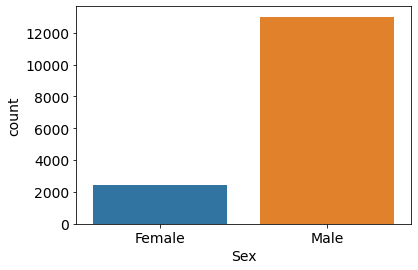

In [8]:
# DATA VISUALIZATION

#Comparing number of vehicle insurance claim between Male and Female

sns.countplot(x = 'Sex', data = dataset)

<AxesSubplot:xlabel='AgeOfPolicyHolder', ylabel='count'>

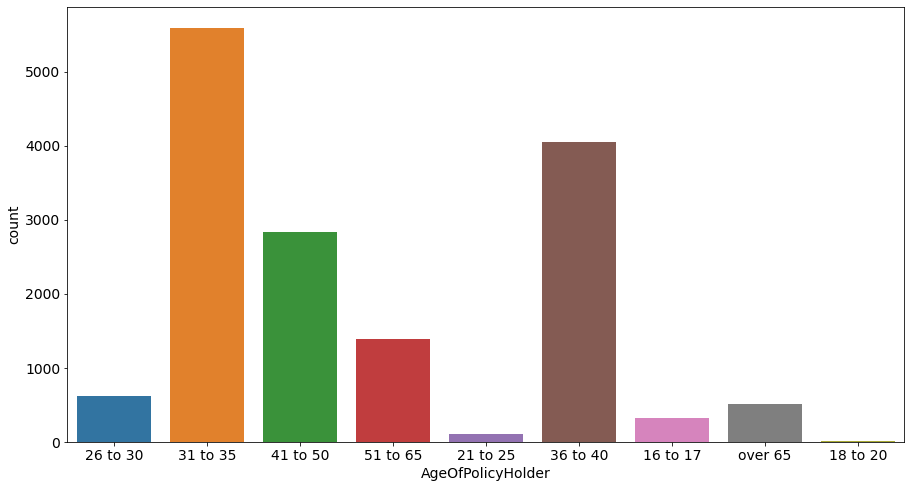

In [9]:
#Comparing age groups with number of vehicle insurance claims

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'AgeOfPolicyHolder', ax=ax, data = dataset)



In [10]:
#Comparing the vehicle insurance claim ratio of male and female among different age groups

age_gender = dataset.groupby(['AgeOfPolicyHolder']).Sex.value_counts(normalize=True)
age_gender.unstack()

Sex,Female,Male
AgeOfPolicyHolder,,
16 to 17,NaN,1.000000
18 to 20,0.066667,0.933333
21 to 25,0.148148,0.851852
26 to 30,0.195759,0.804241
31 to 35,0.201502,0.798498
36 to 40,0.165719,0.834281
41 to 50,0.126945,0.873055
51 to 65,0.068247,0.931753
over 65,0.062992,0.937008


<AxesSubplot:>

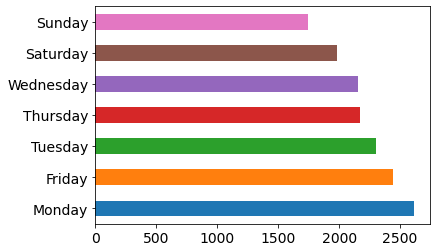

In [11]:
#Comparing day of the week with number of vehicle insurance claim

dataset.DayOfWeek.value_counts().plot(kind='barh', color=['C0','C1','C2','C3','C4','C5','C6'])



<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

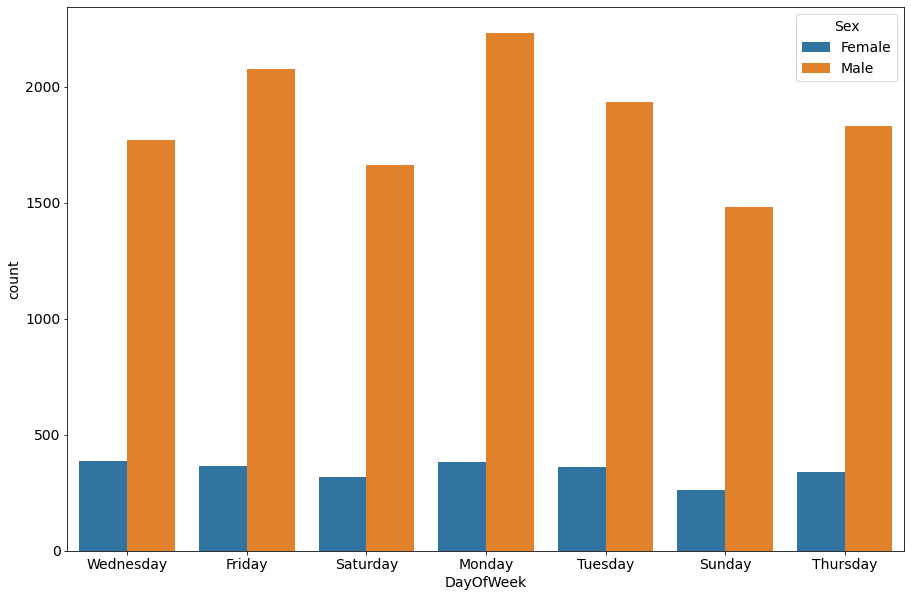

In [12]:
#Comparing day of the week with number of vehicle insurance claim w.r.t male and female

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'DayOfWeek', hue = 'Sex', ax = ax, data = dataset)



<AxesSubplot:xlabel='Make', ylabel='count'>

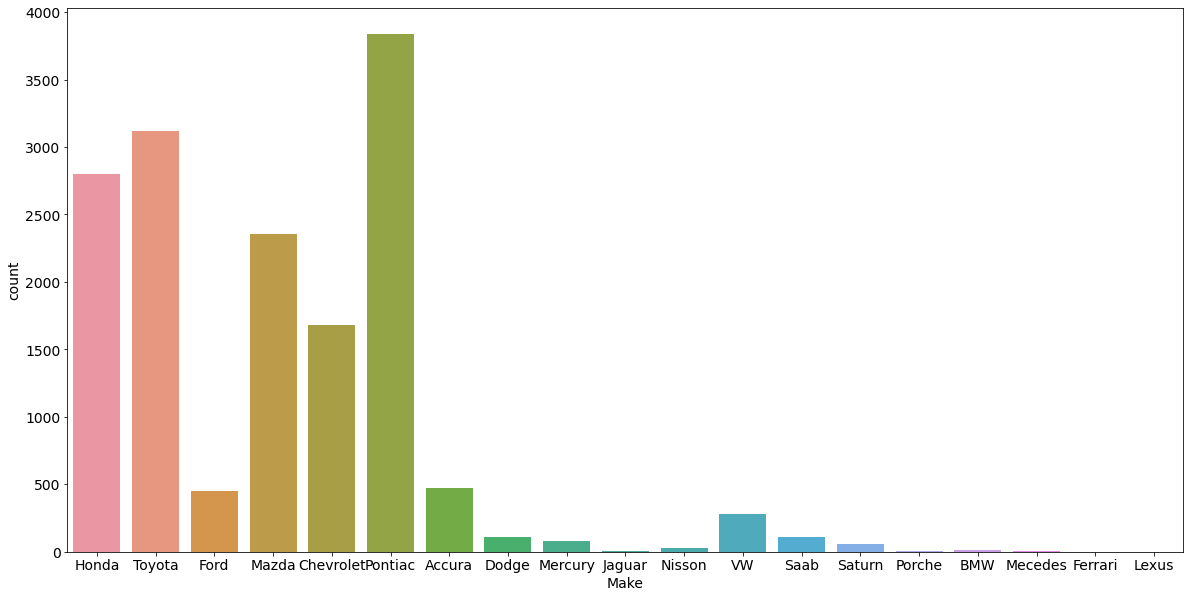

In [13]:
#Comparing vehicle make with number of vehicle insurance claim

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Make',ax = ax, data = dataset )

In [14]:
#Calculating frequency of each variable

df1 = dataset.groupby('DayOfWeekClaimed').agg({"DayOfWeekClaimed":"count"})
print(df1)

df2 = dataset.groupby('MonthClaimed').agg({"MonthClaimed": "count"})
print(df2)

df3 = dataset.groupby('Age').agg({"Age": "count"})
print(df3)


#dataset = dataset[dataset.DayOfWeekClaimed!=0]

                  DayOfWeekClaimed
DayOfWeekClaimed                  
0                                1
Friday                        2497
Monday                        3757
Saturday                       127
Sunday                          52
Thursday                      2660
Tuesday                       3375
Wednesday                     2951
              MonthClaimed
MonthClaimed              
0                        1
Apr                   1271
Aug                   1126
Dec                   1146
Feb                   1287
Jan                   1446
Jul                   1225
Jun                   1293
Mar                   1348
May                   1411
Nov                   1285
Oct                   1339
Sep                   1242
     Age
Age     
0    320
16     9
17     6
18    48
19    32
..   ...
76    42
77    29
78    35
79    20
80    32

[66 rows x 1 columns]


### While checking for unique values in the dataset, we came across irregulaties. 

In [15]:
# the days were labelled as Mon to Sun and 0 which was error
dataset = dataset[dataset.DayOfWeekClaimed!=0]

# the months had lables from Jan to Dec and 0 
dataset = dataset[dataset.MonthClaimed!=0]

# certain tuples had the age of the person claiming insurance as 0
dataset = dataset[dataset.Age!=0]

### Encoding categorical values in the dataset 

In [16]:
#Encoding the variables and preparing it for Random Forest Model

#print(dataset['Fault'].dtype)
dfp = dataset['Fault'].replace({"Policy Holder": 1, "Third Party": 2})
dataset['Fault'] = dfp

dfp = dataset['DayOfWeek'].replace({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7 })
dataset['DayOfWeek'] = dfp
#print(dataset['Fault'].dtype)

dfp = dataset['AccidentArea'].replace({"Urban": 1, "Rural": 2})
dataset['AccidentArea'] = dfp

dfp = dataset['DayOfWeekClaimed'].replace({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7 })
dataset['DayOfWeekClaimed'] = dfp

dfp = dataset['PoliceReportFiled'].replace({"No": 0, "Yes": 1})
dataset['PoliceReportFiled'] = dfp

dfp = dataset['WitnessPresent'].replace({"No": 0, "Yes": 1})
dataset['WitnessPresent'] = dfp

dfp = dataset['AgentType'].replace({"External": 1, "Internal": 2})
dataset['AgentType'] = dfp

#replacing the categorical value 2 to 4 with mean 3 and more than 4 with arbitrary value 7
dfp = dataset['PastNumberOfClaims'].replace({"none": 0, "1": 1, "2 to 4": 3, "more than 4": 7})
dataset['PastNumberOfClaims'] = dfp

dfp = dataset['Make'].replace({"Honda": 1, "Toyota": 2, "Ford": 3, "Mazda": 4, "Chevrolet": 5, "Pontiac": 6, "Accura": 7, "Dodge": 8,
 "Mercury": 9, "Jaguar": 10, "Nisson": 11, "VW": 12, "Saab": 13, "Saturn": 14, "Porche": 15, "BMW":16, "Mecedes": 17,
 "Ferrari": 18, "Lexus": 19 })
dataset['Make'] = dfp

dfp = dataset['VehicleCategory'].replace({"Sport": 1, "Utility": 2, "Sedan": 3})
dataset['VehicleCategory'] = dfp


dfp = dataset['AgeOfVehicle'].replace({"new": 0.1, "2 years": 2.0, "3 years": 3.0, "4 years": 4.0, "5 years": 5.0, "6 years": 6.0, "7 years": 7, "more than 7": 8})
dataset['AgeOfVehicle'] = dfp


dfp = dataset['Days_Policy_Accident'].replace({"none": 0, "1 to 7": 4, "8 to 15": 12, "15 to 30": 23, "more than 30": 36 })
dataset['Days_Policy_Accident'] = dfp

dfp = dataset['Days_Policy_Claim'].replace({"none": 0, "8 to 15": 12, "15 to 30": 23, "more than 30": 36 })
dataset['Days_Policy_Claim'] = dfp

dfp = dataset['NumberOfCars'].replace({"1 vehicle": 1, "2 vehicles": 2, "3 to 4": 4, "5 to 8": 7, "more than 8": 9 })
dataset['NumberOfCars'] = dfp


dfp1 = dataset['PolicyType']

dfp =  dataset['PolicyType'].replace({"Sport - Liability":"Liability", "Sport - Collision": "Collision", "Sedan - Liability": "Liability",
 "Utility - All Perils": "All Perils", "Sedan - All Perils": "All Perils", "Sedan - Collision": "Collision",
 "Utility - Collision": "Collision", "Utility - Liability": "Liability", "Sport - All Perils": "All Perils" })


 
print("Columns PolicyType and BasePolicy are the same? ",dfp.equals(dataset['BasePolicy']))

dfp =  dataset['PolicyType'].replace({"Sport - Liability": 1, "Sport - Collision": 1, "Sedan - Liability": 3,
 "Utility - All Perils": 2, "Sedan - All Perils": 3, "Sedan - Collision": 3,
 "Utility - Collision": 2, "Utility - Liability": 2, "Sport - All Perils": 1 })

dataset['PolicyType'] = dfp

dfp = dataset['BasePolicy'].replace({"Liability": 1, "Collision": 2, "All Perils": 3})
dataset['BasePolicy'] = dfp

#1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months: using max values for this case
dfp = dataset['AddressChange_Claim'].replace({"no change": 0, "under 6 months": 0.5, "1 year": 1, "2 to 3 years": 3, "4 to 8 years": 8})
dataset['AddressChange_Claim'] = dfp

#none' 'more than 5' '3 to 5' '1 to 2
dfp = dataset['NumberOfSuppliments'].replace({"none": 0, "1 to 2": 2, "3 to 5": 4, "more than 5": 6})
dataset['NumberOfSuppliments'] = dfp

#more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000' '40000 to 59000' '60000 to 69000
dfp = dataset['VehiclePrice'].replace({"less than 20000": 15000, "20000 to 29000": 25000, "30000 to 39000": 35000, "40000 to 59000": 50000, "60000 to 69000": 65000, "more than 69000": 80000})
dataset['VehiclePrice'] = dfp

#26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40' '16 to 17' 'over 65' '18 to 20
dfp = dataset['AgeOfPolicyHolder'].replace({"16 to 17": 17, "18 to 20": 20, "21 to 25": 23, "26 to 30": 28, "31 to 35": 33, "36 to 40": 38, "41 to 50": 45, "51 to 65": 58, "over 65": 72})
dataset['AgeOfPolicyHolder'] = dfp


print("Columns PolicyType and BasePolicy are the same? ",dataset['Days_Policy_Accident'].equals(dataset['Days_Policy_Claim']))


dataset.drop('PolicyNumber', axis = 1, inplace = True)

dataset.head()

Columns PolicyType and BasePolicy are the same?  True
Columns PolicyType and BasePolicy are the same?  False


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,3,1,1,2,Jan,1,Female,Single,21,1,1,1,80000,0,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,Jan,3,3,1,1,1,Jan,4,Male,Single,34,1,1,1,80000,0,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,Oct,5,5,1,1,4,Nov,2,Male,Married,47,1,1,1,80000,0,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,Jun,2,6,2,2,5,Jul,1,Male,Married,65,2,3,1,25000,0,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,Jan,5,1,1,1,2,Feb,2,Female,Single,27,2,1,1,80000,0,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [17]:
df1 = dataset.groupby('DayOfWeekClaimed').agg({"DayOfWeekClaimed":"count"})
print(df1)

df2 = dataset.groupby('MonthClaimed')['MonthClaimed'].count()
print(df2)

df3 = dataset.groupby('Age').agg({"Age": "count"})
print(df3)


#plt.hist(df2['MonthClaimed'])

                  DayOfWeekClaimed
DayOfWeekClaimed                  
1                             3684
2                             3297
3                             2890
4                             2616
5                             2434
6                              127
7                               52
MonthClaimed
Apr    1217
Aug    1118
Dec    1139
Feb    1240
Jan    1375
Jul    1216
Jun    1271
Mar    1298
May    1376
Nov    1276
Oct    1337
Sep    1237
Name: MonthClaimed, dtype: int64
     Age
Age     
16     9
17     6
18    48
19    32
20    28
..   ...
76    42
77    29
78    35
79    20
80    32

[65 rows x 1 columns]


In [18]:
df4 = dataset['MonthClaimed'].unique()
print(df4)
#c1 = 
#df4['count'] = c1

['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']


In [19]:
monthlabel = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec': 12}
dataset.head()
#dataset['Month'].apply(lambda x: monthlabel[x])


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,3,1,1,2,Jan,1,Female,Single,21,1,1,1,80000,0,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,Jan,3,3,1,1,1,Jan,4,Male,Single,34,1,1,1,80000,0,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,Oct,5,5,1,1,4,Nov,2,Male,Married,47,1,1,1,80000,0,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,Jun,2,6,2,2,5,Jul,1,Male,Married,65,2,3,1,25000,0,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,Jan,5,1,1,1,2,Feb,2,Female,Single,27,2,1,1,80000,0,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [20]:
print(dataset['Month'].dtype)

print(dataset['MonthClaimed'].dtype)



object
object


In [21]:
encoder1= ce.OrdinalEncoder(cols=['Month'],return_df=True,
                           mapping=[{'col':'Month',
'mapping':{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec': 12}}])


#Original data
#train_df
dataset = encoder1.fit_transform(dataset)

dataset.head()



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,1,1,2,Jan,1,Female,Single,21,1,1,1,80000,0,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,1,3,3,1,1,1,Jan,4,Male,Single,34,1,1,1,80000,0,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,10,5,5,1,1,4,Nov,2,Male,Married,47,1,1,1,80000,0,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,6,2,6,2,2,5,Jul,1,Male,Married,65,2,3,1,25000,0,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,1,5,1,1,1,2,Feb,2,Female,Single,27,2,1,1,80000,0,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [22]:
encoder2= ce.OrdinalEncoder(cols=['MonthClaimed'],return_df=True, 
                           mapping=[{'col':'MonthClaimed',
'mapping':{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec': 12}}])

#Original data
#train_df
dataset = encoder2.fit_transform(dataset)
dataset.head()



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,1,1,2,1,1,Female,Single,21,1,1,1,80000,0,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,1,3,3,1,1,1,1,4,Male,Single,34,1,1,1,80000,0,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,10,5,5,1,1,4,11,2,Male,Married,47,1,1,1,80000,0,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,6,2,6,2,2,5,7,1,Male,Married,65,2,3,1,25000,0,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,1,5,1,1,1,2,2,2,Female,Single,27,2,1,1,80000,0,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [23]:
encoder3= ce.OrdinalEncoder(cols=['Sex'],return_df=True, 
                           mapping=[{'col':'Sex',
'mapping':{'Female': 0, 'Male': 1}}])

#Original data
#train_df
dataset = encoder3.fit_transform(dataset)

encoder4 = ce.OrdinalEncoder(cols=['MaritalStatus'],return_df=True, 
                           mapping=[{'col':'MaritalStatus',
'mapping':{'Single': 1, 'Married': 2, 'Widow': 3, 'Divorced':4 }}])

#Original data
#train_df
dataset = encoder4.fit_transform(dataset)

dataset.head()



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,1,1,2,1,1,0,1,21,1,1,1,80000,0,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,1,3,3,1,1,1,1,4,1,1,34,1,1,1,80000,0,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,10,5,5,1,1,4,11,2,1,2,47,1,1,1,80000,0,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,6,2,6,2,2,5,7,1,1,2,65,2,3,1,25000,0,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,1,5,1,1,1,2,2,2,0,1,27,2,1,1,80000,0,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [24]:
dataset['MonthClaimed'].astype('int64')
print(dataset['MonthClaimed'].dtype," and ", dataset['WeekOfMonth'].dtype)



int64  and  int64


In [25]:
y = dataset['FraudFound_P']
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15100, dtype: int64

### Implementation of machine learning model (Random Forest)

In [48]:
#Implementation of machine learning model (Random Forest)

# Splitting features and target variable as x and y    
result = []
for x in dataset.columns:
    if x != 'FraudFound_P':
        result.append(x)

X = dataset[result].values
y = dataset['FraudFound_P'].values


#Instantiate the model with 10 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=10,criterion="entropy")

# splitting data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

#Train the model
Random_Forest_model.fit(X_train, y_train)

#make predictions
y_pred = Random_Forest_model.predict(X_test)


#Calculate accuracy metric
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')



The accuracy is:  94.37086092715232 %


In [49]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4270    4]
 [ 251    5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4274
           1       0.56      0.02      0.04       256

    accuracy                           0.94      4530
   macro avg       0.75      0.51      0.50      4530
weighted avg       0.92      0.94      0.92      4530



In [50]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(Random_Forest_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


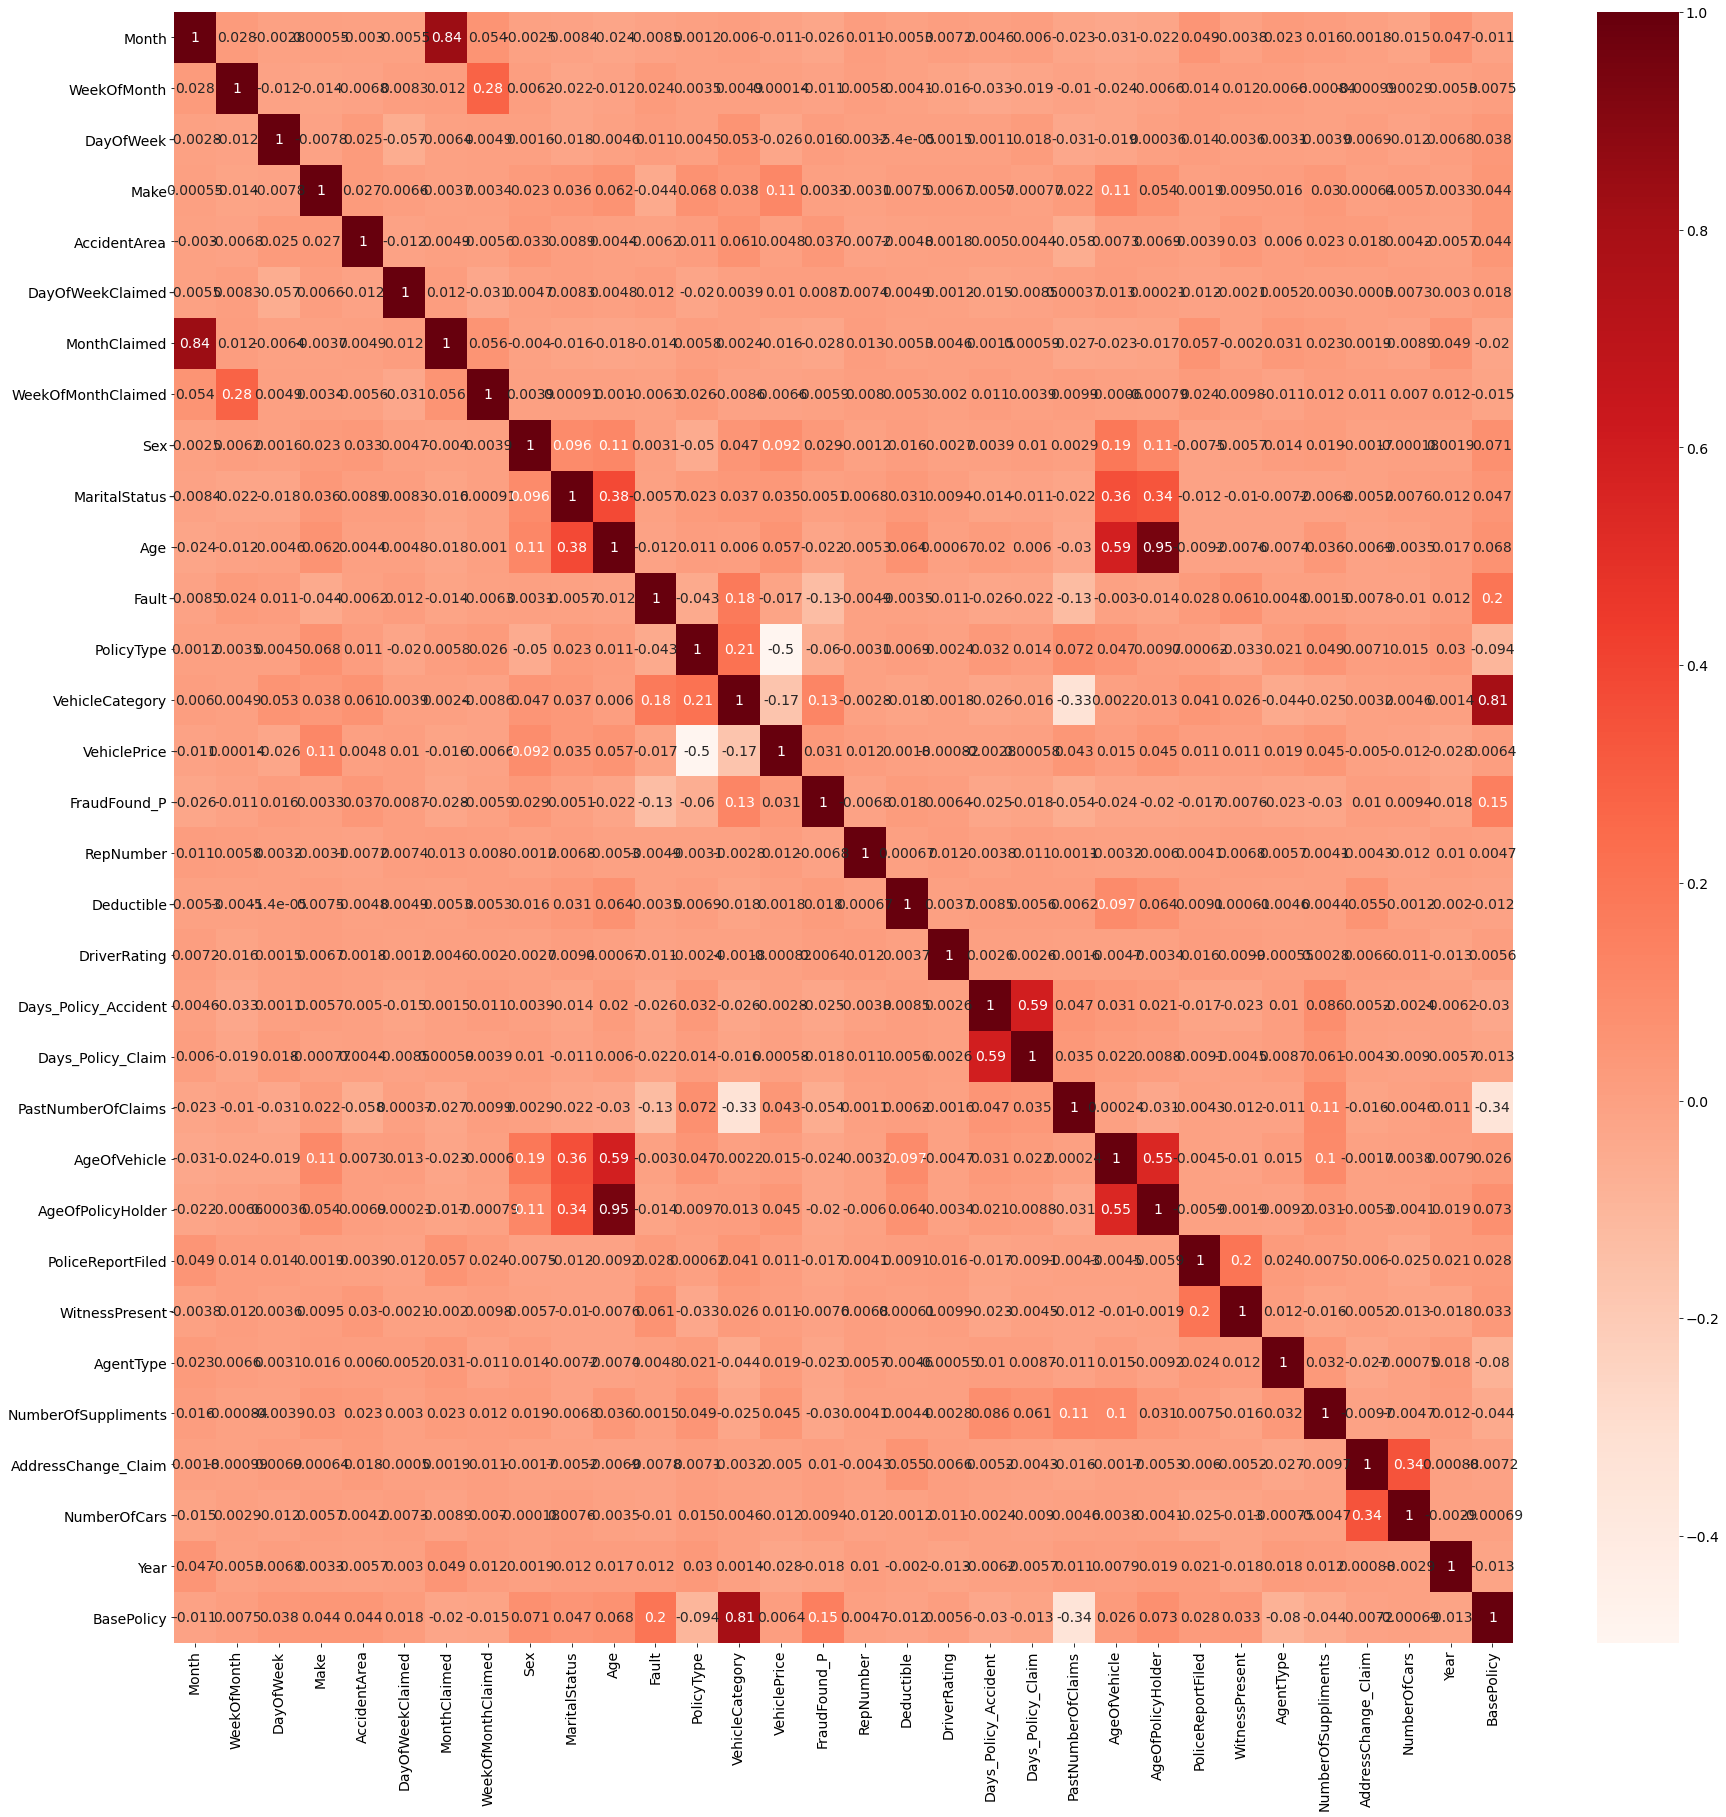

Fault              0.130917
VehicleCategory    0.127741
FraudFound_P       1.000000
BasePolicy         0.152528
Name: FraudFound_P, dtype: float64


In [51]:
# Function for plotting the correlation matrix between features and target variables

def cor_matrix(dataset,target_val):
    plt.figure(figsize = (30,30))
    # Compute the correlation matrix
    cor = dataset.corr()
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    #Correlation with output variable
    cor_target = abs(cor["FraudFound_P"])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>target_val]
    return relevant_features


# setting minimum correlation value to 0.1
relevant_features = cor_matrix(dataset, 0.1)
print(relevant_features)

In [53]:
# Performing feature selection on the dataset. 
# Using only the features which have a correlation value higher than 0.1

small_features = ['Fault', 'VehicleCategory', 'BasePolicy']

X1 = dataset[small_features].values # training features
y1 = dataset['FraudFound_P'].values # target variable

# splitting dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=44)

#Train the model
Random_Forest_model.fit(X1_train, y1_train)

#make predictions
y1_pred = Random_Forest_model.predict(X1_test)

accuracy = accuracy_score(y1_pred, y1_test)
print('The accuracy is: ',accuracy*100,'%')


The accuracy is:  94.34878587196468 %


In [54]:
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))


[[4274    0]
 [ 256    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4274
           1       0.00      0.00      0.00       256

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.49      4530
weighted avg       0.89      0.94      0.92      4530



/Users/fai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fai/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


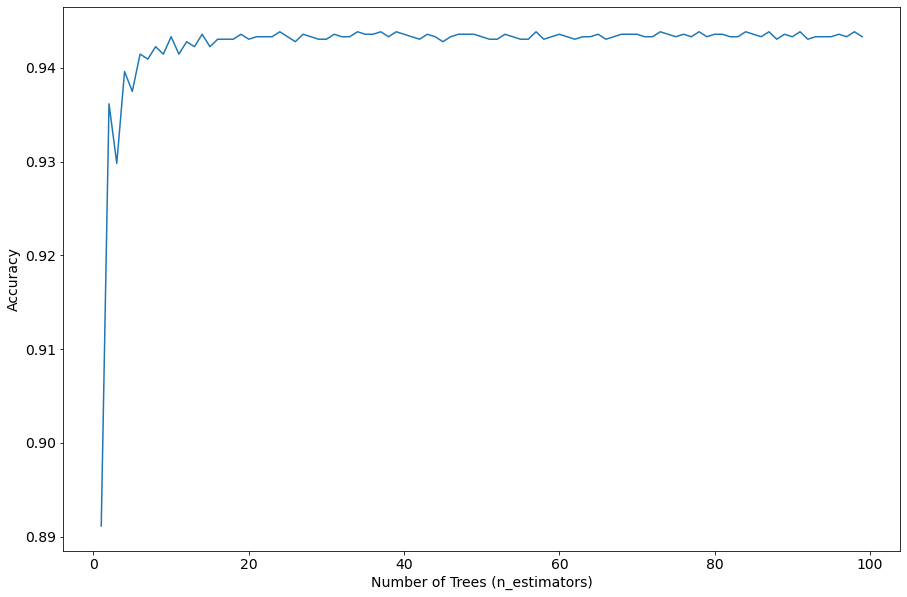

In [32]:
# trying to see the effect of the no of estimators in the random forest model
# varying the number of estimators from 1 to 100 and checking the accuracy of the model

fig = plt.figure(figsize=(15,10))

accuracy_data = []
nums = []
for i in range(1,100):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
#print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

### In our dataset, we had almost 14000 tuples of one class and less than a 1000 for the other class of the target variable (FraudFound_P). We decided to reduce the dataset and make it a bit more even by taking random samples from the dataset.

In [55]:
df1 = dataset[dataset['FraudFound_P'] == 0]
print(len(df1))
df1 = df1.sample(n = 2000)
#print(len(df1))

14208


In [56]:
df2 = dataset[dataset['FraudFound_P'] ==1]
len(df2)

892

In [57]:
# Creating a new dataset with fewer tuples

newds = pd.concat([df1,df2])
len(newds)

2892

### Establishing Baseline. 
### The new dataset now has only 2892 tuples out of which 2000 belong to one class and 892 belong to the other class. The baseline will be set as the accuracy if all the tuples are classified as the most frequent class

In [58]:
baseline = len(df1)/len(newds)
print("Baseline is = ", baseline)

Baseline is =  0.6915629322268326


### 69.15% would be the accuracy if all the tuples of the new dataset were classified as members of class 0. 

In [59]:
#Reducing the dataset and testing out results
# Splitting the training features and target variables

result = []
for x in newds.columns:
    if x != 'FraudFound_P':
        result.append(x)

X = newds[result].values
y = newds['FraudFound_P'].values

#Training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

# Using random forest model with 25 trees
Random_Forest_model = RandomForestClassifier(n_estimators=25,criterion="entropy")


#Training the model using the new dataset
Random_Forest_model.fit(X_train, y_train)

#make predictions
y_pred = Random_Forest_model.predict(X_test)


#Calculate accuracy metric
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')



The accuracy is:  73.50230414746544 %


In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[487 110]
 [120 151]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       597
           1       0.58      0.56      0.57       271

    accuracy                           0.74       868
   macro avg       0.69      0.69      0.69       868
weighted avg       0.73      0.74      0.73       868



In [61]:
# Get numerical feature importances
importances = list(Random_Forest_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(result, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {} \t\t\t Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Fault 			 Importance: 0.1
Variable: BasePolicy 			 Importance: 0.09
Variable: Age 			 Importance: 0.08
Variable: RepNumber 			 Importance: 0.06
Variable: Month 			 Importance: 0.05
Variable: DayOfWeek 			 Importance: 0.05
Variable: Make 			 Importance: 0.05
Variable: MonthClaimed 			 Importance: 0.05
Variable: WeekOfMonth 			 Importance: 0.04
Variable: DayOfWeekClaimed 			 Importance: 0.04
Variable: WeekOfMonthClaimed 			 Importance: 0.04
Variable: VehicleCategory 			 Importance: 0.04
Variable: Year 			 Importance: 0.04
Variable: VehiclePrice 			 Importance: 0.03
Variable: Deductible 			 Importance: 0.03
Variable: DriverRating 			 Importance: 0.03
Variable: PastNumberOfClaims 			 Importance: 0.03
Variable: AgeOfVehicle 			 Importance: 0.03
Variable: AgeOfPolicyHolder 			 Importance: 0.03
Variable: NumberOfSuppliments 			 Importance: 0.03
Variable: AddressChange_Claim 			 Importance: 0.02
Variable: AccidentArea 			 Importance: 0.01
Variable: Sex 			 Importance: 0.01
Variable: 

### Visualizing Important Features for Random Forest

Fault


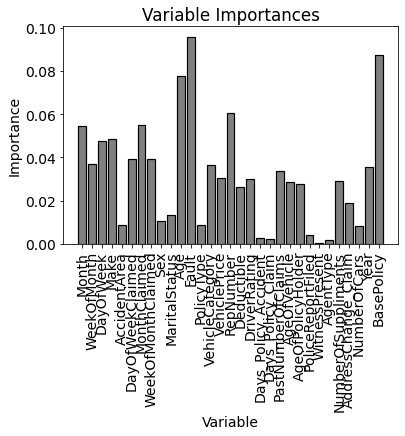

In [62]:
#Visualizing Important Features for Random Forest

# list of x locations for plotting
x_values = list(range(len(importances)))
print(feature_importances[0][0])

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'grey', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, result, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

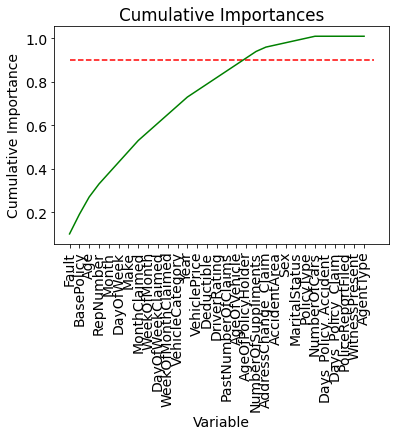

In [63]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 90% of importance retained
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [64]:
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)
print("\n\n",cumulative_importances)
print("\n\n",sorted_features[0:19])

Number of features for 90% importance: 19


 [0.1  0.19 0.27 0.33 0.38 0.43 0.48 0.53 0.57 0.61 0.65 0.69 0.73 0.76
 0.79 0.82 0.85 0.88 0.91 0.94 0.96 0.97 0.98 0.99 1.   1.01 1.01 1.01
 1.01 1.01 1.01]


 ['Fault', 'BasePolicy', 'Age', 'RepNumber', 'Month', 'DayOfWeek', 'Make', 'MonthClaimed', 'WeekOfMonth', 'DayOfWeekClaimed', 'WeekOfMonthClaimed', 'VehicleCategory', 'Year', 'VehiclePrice', 'Deductible', 'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder']


In [65]:
small_features = sorted_features[0:19]

X1 = newds[small_features].values
y1 = newds['FraudFound_P'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=44)

#Train the model
Random_Forest_model.fit(X1_train, y1_train)

#make predictions
y1_pred = Random_Forest_model.predict(X1_test)

#Calculate accuracy metric
accuracy = accuracy_score(y1_pred, y1_test)
print('The accuracy is: ',accuracy*100,'%')



The accuracy is:  73.84792626728111 %


In [66]:
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))


[[497 100]
 [127 144]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       597
           1       0.59      0.53      0.56       271

    accuracy                           0.74       868
   macro avg       0.69      0.68      0.69       868
weighted avg       0.73      0.74      0.73       868



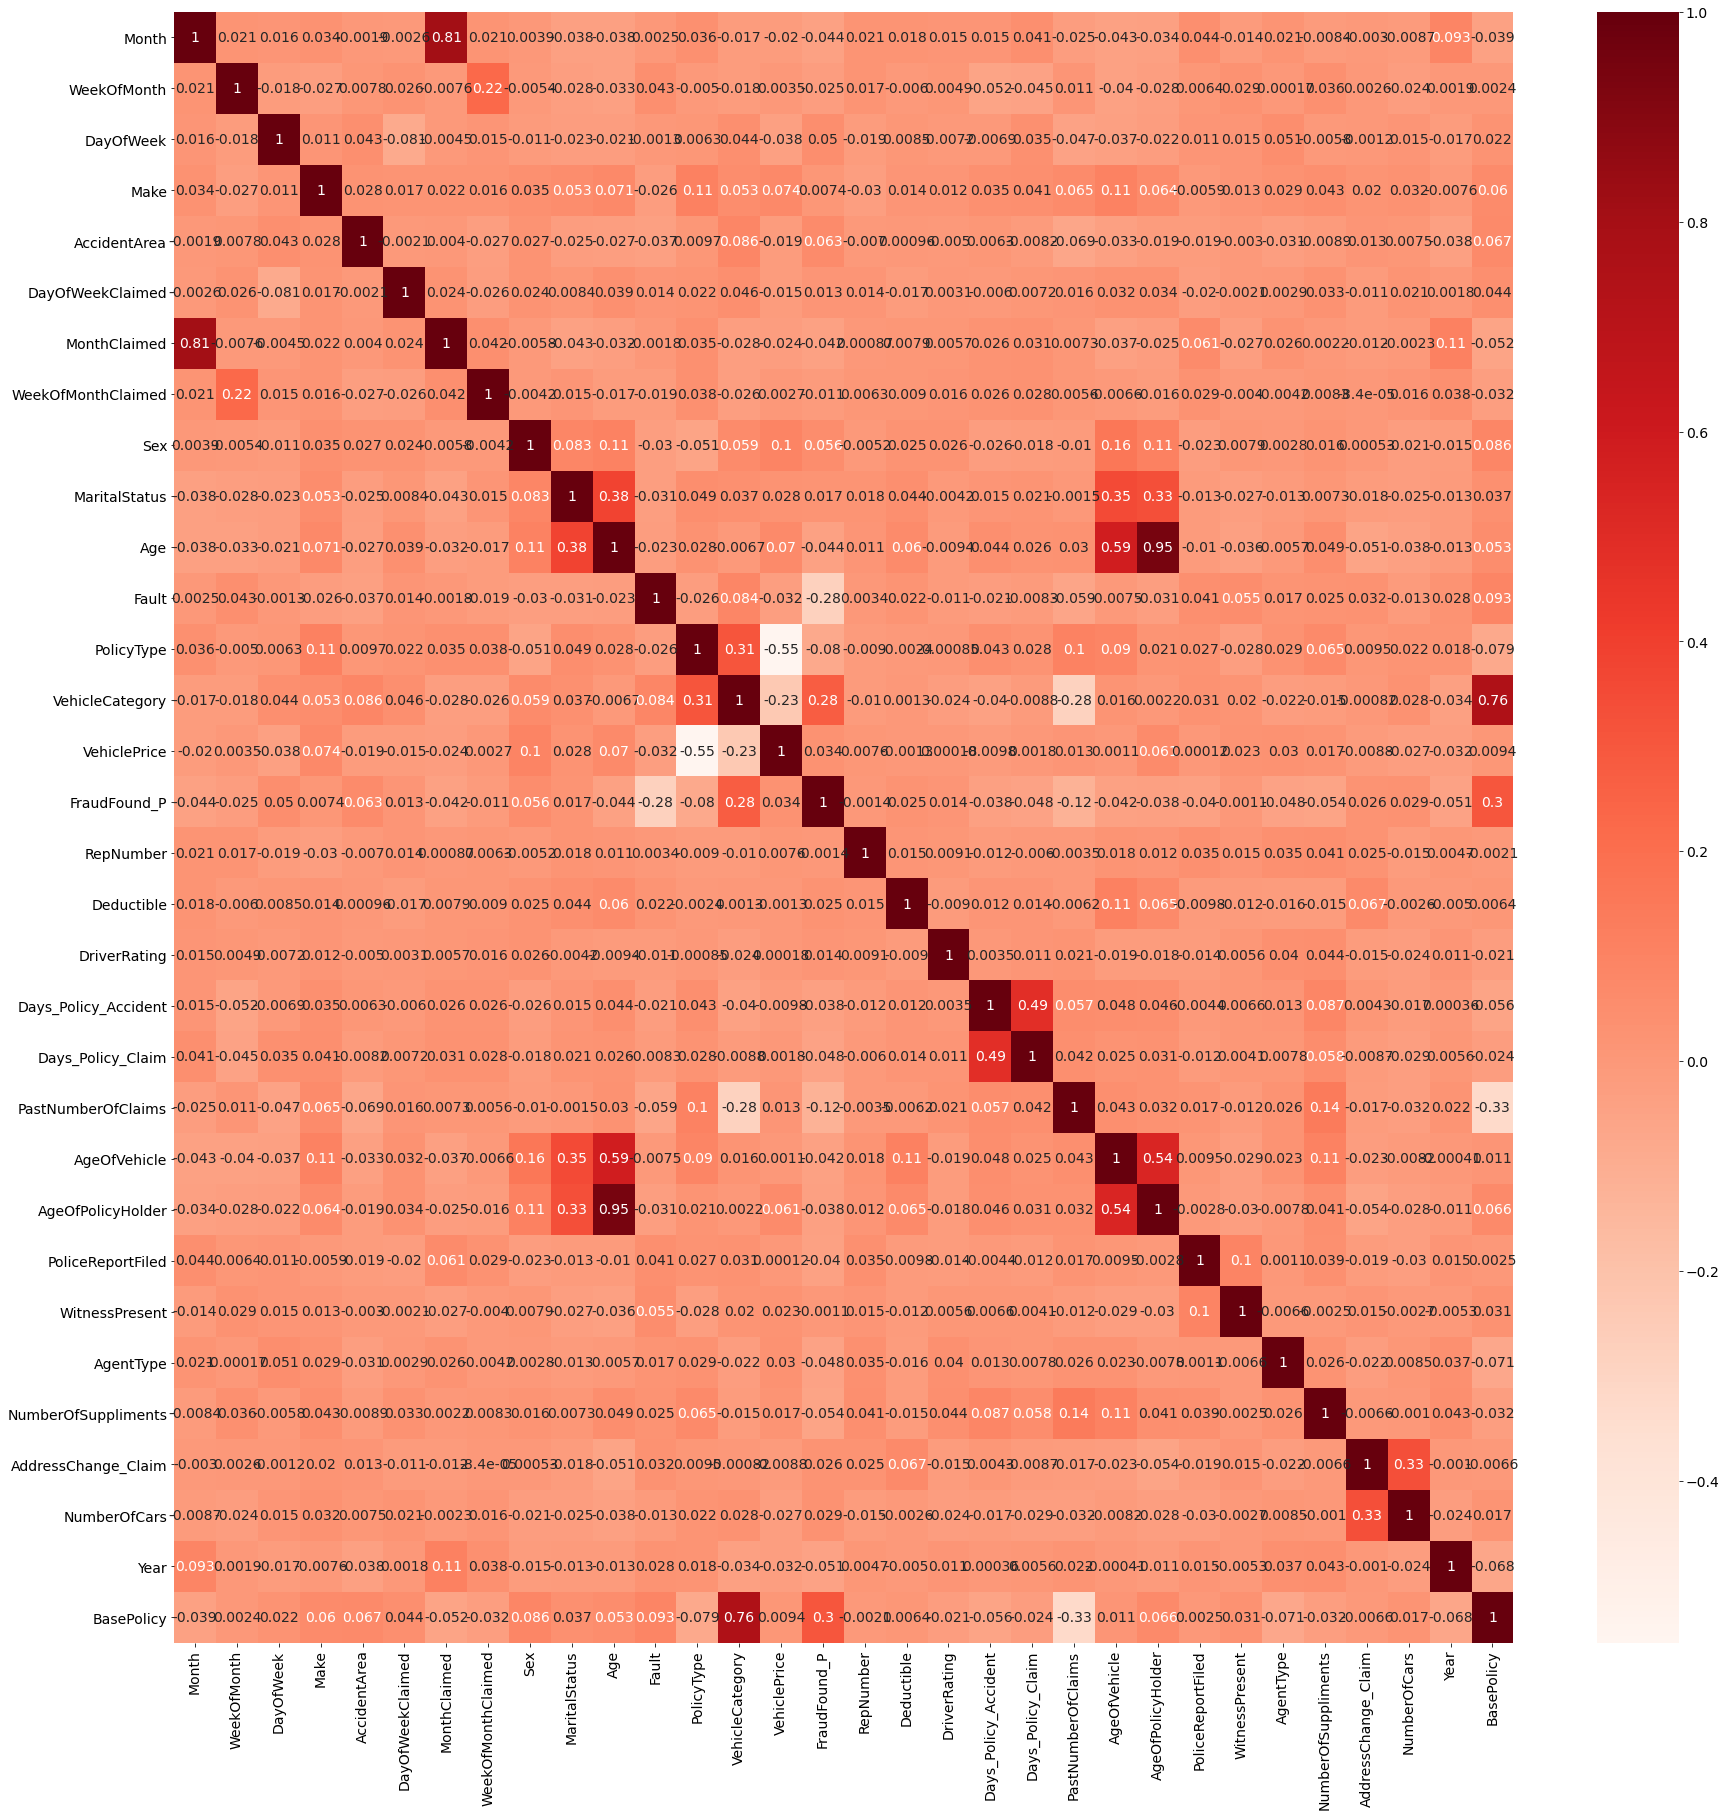

Fault                 0.280969
VehicleCategory       0.275235
FraudFound_P          1.000000
PastNumberOfClaims    0.120509
BasePolicy            0.302273
Name: FraudFound_P, dtype: float64


In [72]:
relevant_features = cor_matrix(newds, 0.1)
print(relevant_features)

In [67]:
#Feature selection
# Using only the features with correlation value greater than 0.1

small_features = ['Fault', 'VehicleCategory', 'PastNumberOfClaims', 'BasePolicy']
X1 = newds[small_features].values
y1 = newds['FraudFound_P'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=44)

#Train the model
Random_Forest_model.fit(X1_train, y1_train)

#make predictions
y1_pred = Random_Forest_model.predict(X1_test)

#Calculate accuracy metric
accuracy = accuracy_score(y1_pred, y1_test)
print('The accuracy is: ',accuracy*100,'%')



The accuracy is:  74.30875576036865 %


In [68]:
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))



[[536  61]
 [162 109]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       597
           1       0.64      0.40      0.49       271

    accuracy                           0.74       868
   macro avg       0.70      0.65      0.66       868
weighted avg       0.73      0.74      0.72       868



### Implementing basic neural network

In [226]:
#Implementing basic neural network

import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras
print("Tensor Flow Version: {}".format(tf.__version__))

print(f"Keras Version: {keras.__version__}")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




Tensor Flow Version: 2.7.0
Keras Version: 2.7.0


In [227]:
result = []
for x in newds.columns:
    if x != 'FraudFound_P':
        result.append(x)

X = newds[result].values
y = newds['FraudFound_P'].values


print(X.shape[1])
print(y.shape[0])
target_type = newds['FraudFound_P'].dtype
target = 'FraudFound_P'

target_type = target_type[0] if hasattr(
        target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
if target_type in (np.int64, np.int32):
  # Classification
  dummies = pd.get_dummies(newds[target])

X = newds[result].values.astype(np.float32) 
y = dummies.values.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)



31
2892


In [228]:
# Creating a neural network. It will take input as the number 
# of features and to get the output we have a softmax layer to classify it as one of the two possible classes

model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(X_train,y_train,verbose=2,epochs=200)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Epoch 1/200
64/64 - 1s - loss: 217.6339 - 608ms/epoch - 10ms/step
Epoch 2/200
64/64 - 0s - loss: 51.5133 - 103ms/epoch - 2ms/step
Epoch 3/200
64/64 - 0s - loss: 66.6418 - 113ms/epoch - 2ms/step
Epoch 4/200
64/64 - 0s - loss: 99.5088 - 124ms/epoch - 2ms/step
Epoch 5/200
64/64 - 0s - loss: 69.7569 - 104ms/epoch - 2ms/step
Epoch 6/200
64/64 - 0s - loss: 58.0687 - 116ms/epoch - 2ms/step
Epoch 7/200
64/64 - 0s - loss: 37.0587 - 112ms/epoch - 2ms/step
Epoch 8/200
64/64 - 0s - loss: 74.9438 - 107ms/epoch - 2ms/step
Epoch 9/200
64/64 - 0s - loss: 43.2149 - 98ms/epoch - 2ms/step
Epoch 10/200
64/64 - 0s - loss: 50.7311 - 124ms/epoch - 2ms/step
Epoch 11/200
64/64 - 0s - loss: 34.6222 - 104ms/epoch - 2ms/step
Epoch 12/200
64/64 - 0s - loss: 67.8544 - 102ms/epoch - 2ms/step
Epoch 13/200
64/64 - 0s - loss: 31.3179 - 117ms/epoch - 2ms/step
Epoch 14/200
64/64 - 0s - loss: 41.8999 - 105ms/epoch - 2ms/step
Epoch 15/200
64/64 - 0s - loss: 43.8972 - 125ms/epoch - 2ms/step
Epoch 16/200
64/64 - 0s - loss: 2

In [155]:
# Tuning the Neural network

# Trying to check the performance of the model while varying different hyperparameters 
# like the optimizer, batch size and nuumber of epochs
# Wrapping the model using KerasClassifier and performing GridSearchCV 
# to search through the grid with different combinations of hyperparameters

def create_model(optimizer='adam'):
  # create model, using the same layers as the earlier one
  model = Sequential()
  model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(y.shape[1],activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 30, 50, 100]

epochs = [20, 50, 100, 200]

optimizer = ['SGD', 'Adam', 'Adagrad']

param_grid = dict(optimizer=optimizer, batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Best: 0.694183 using {'batch_size': 20, 'epochs': 100, 'optimizer': 'Adam'}
0.693195 (0.017410) with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'SGD'}
0.519825 (0.088400) with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'Adam'}
0.655087 (0.052220) with: {'batch_size': 10, 'epochs': 20, 'optimizer': 'Adagrad'}
0.693195 (0.017410) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
0.690726 (0.019939) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
0.611675 (0.092770) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adagrad'}
0.693195 (0.017410) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}
0.693195 (0.017410) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adam'}
0.639363 (0.053430) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adagrad'}
0.693195 (0.017410) with: {'batch_size': 10, 'epochs': 200, 'optimizer': 'SGD'}
0.693195 (0.017410) with: {'batch_size': 10, 'epochs': 200, 'optimizer': 'Adam'}
0.608262 (0.119208) with: {'batch_